### Importing the libraries required

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot 
import statsmodels.formula.api as smf
import statsmodels.api as sm

### importing the dataset

In [4]:
raw_data = pd.read_csv("50_Startups.csv")
raw_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## Exploratory Data Analysis:

### Checking if there are any null value

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


 ### Creating dummy variables for the State column

In [6]:
data = raw_data.copy()

In [7]:
data = pd.get_dummies(data, columns=["State"])

In [8]:
data

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


### Checking the correlation

In [9]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


### Visualizing the correlation

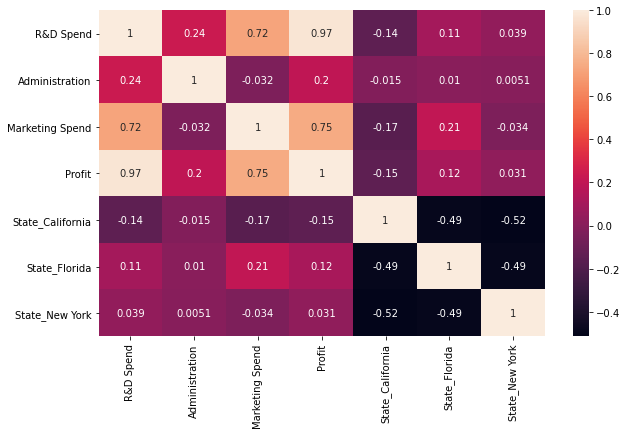

In [12]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, ax=ax)

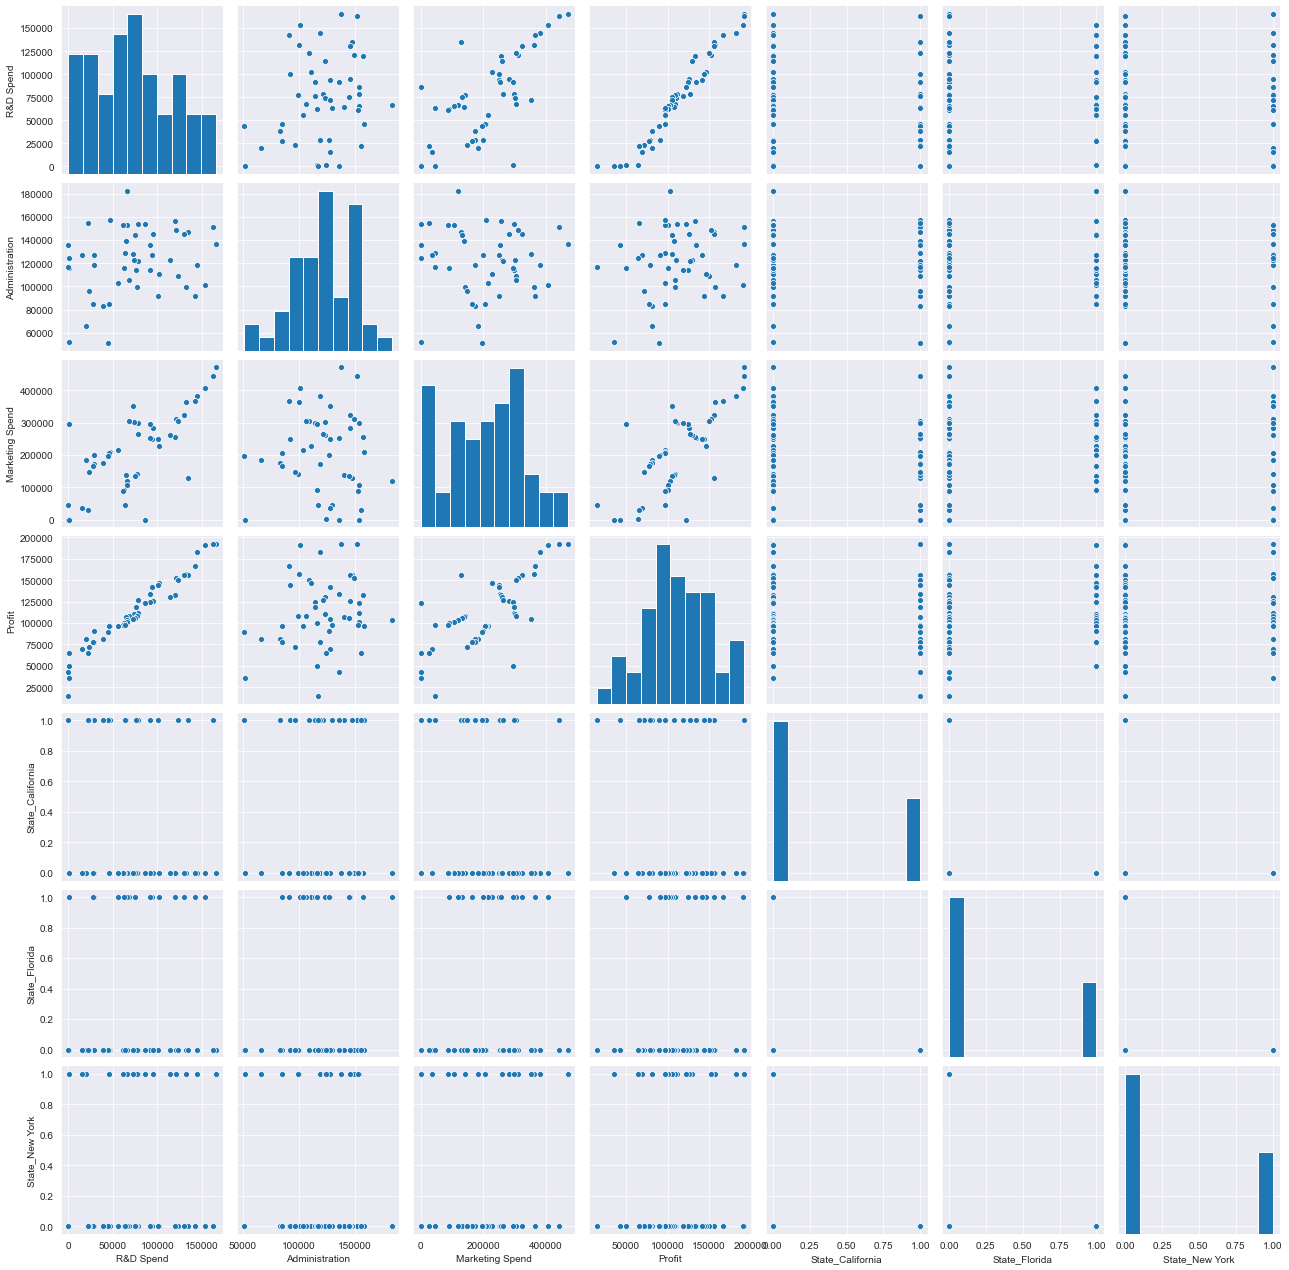

In [13]:
sns.set_style(style = "darkgrid")
sns.pairplot(data)

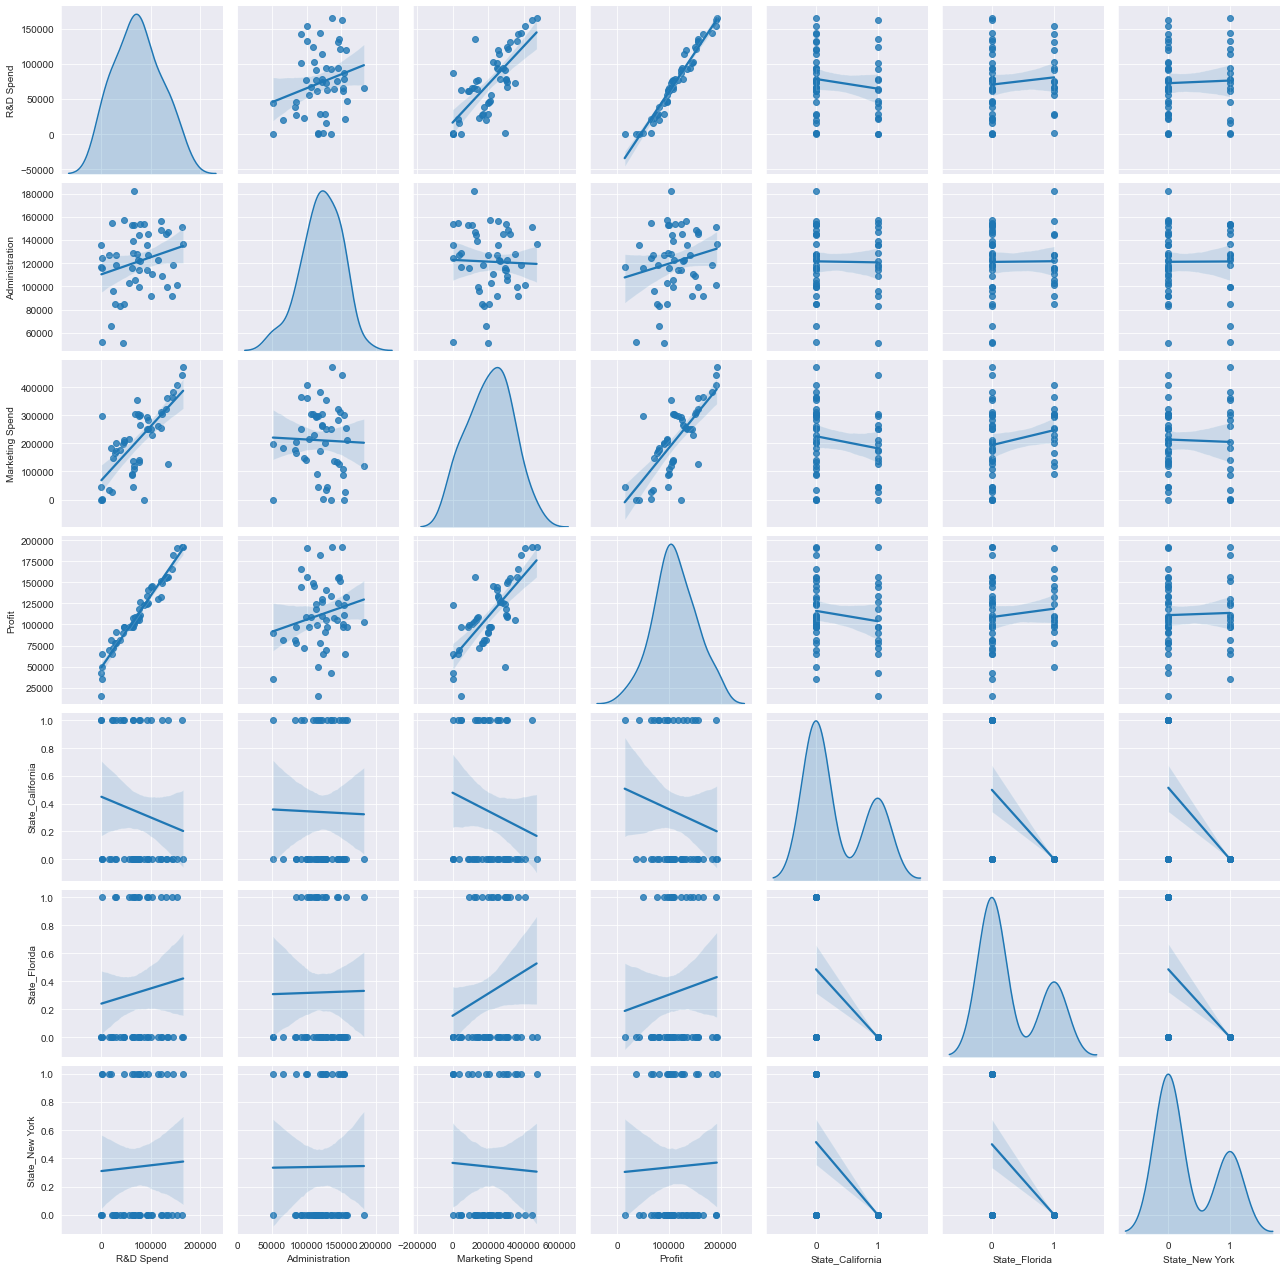

In [14]:
sns.pairplot(data, kind='reg', diag_kind='kde')

### Reanaming the features for convenience

In [16]:
data.rename(columns={'R&D Spend': 'RnD_Spend', 'Marketing Spend': 'Marketing_Spend'}, inplace=True)

## Preparing the initial Model: 

###### Using all the Features except State_New_York so that we avoid multi collinearity also called (Dummy Variable trap)

In [17]:
model = smf.ols("Profit~RnD_Spend+Administration+Marketing_Spend+State_California+State_Florida", data=data).fit()

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           1.34e-27
Time:                        06:11:52   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
RnD_Spend            0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing_Spend      0.0270      0.017      1.574      0.123      -0.008       0.062
State_California    41.8870   3256.039      0.013      0.990   -6520.229    6604.003
State_Florida      240.6758   3338.857      0.072      0.943   -6488.349    6969.701
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.47e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###### Observation: The P-values of Administration, Marketing Spend and State is higher than 0.05

### Checking the P value of these features individually

In [19]:
model_admin = smf.ols("Profit~Administration", data= data).fit()
model_admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Wed, 27 Jan 2021   Prob (F-statistic):              0.162
Time:                        06:12:00   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
model_ms = smf.ols("Profit~Marketing_Spend", data= data).fit()
model_ms.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           4.38e-10
Time:                        06:12:02   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing_Spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
model_state_cali = smf.ols("Profit~State_California", data= data).fit()
model_state_cali.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.043
Date:                Wed, 27 Jan 2021   Prob (F-statistic):              0.312
Time:                        06:12:05   Log-Likelihood:                -600.12
No. Observations:                  50   AIC:                             1204.
Df Residuals:                      48   BIC:                             1208.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.162e+05   7013.324     16.567      0.000    1.02e+05     1.3e+05
State_California -1.228e+04    1.2e+04     -1.021      0.312   -3.65e+04    1.19e+04
==============================================================================
Omnibus:                        0.079   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.961   Jarque-Bera (JB):                0.190
Skew:                           0.087   Prob(JB):                        0.909
Kurtosis:                       2.753   Cond. No.                         2.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model_state_florida = smf.ols("Profit~State_Florida", data= data).fit()
model_state_florida.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6575
Date:                Wed, 27 Jan 2021   Prob (F-statistic):              0.421
Time:                        06:12:07   Log-Likelihood:                -600.31
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      48   BIC:                             1208.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.088e+05   6936.739     15.689      0.000    9.49e+04    1.23e+05
State_Florida  9943.2135   1.23e+04      0.811      0.421   -1.47e+04    3.46e+04
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.123
Skew:                           0.080   Prob(JB):                        0.940
Kurtosis:                       2.817   Cond. No.                         2.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Observation: The P-value of the Marketing Spend feature is significant when individually taken

#### Lets calculate the Variance inflation Factor for each feature

In [23]:
# Function to calculate VIF
def vif(x):
    if x != 1:
        vif_val = 1/(1-x)
    else:
        vif_val = 0
    return vif_val

In [24]:
rsq_admin = smf.ols("Administration~RnD_Spend+Administration+Marketing_Spend+State_California+State_Florida",data=data).fit().rsquared
vif_admin = vif(rsq_admin)

rsq_ms = smf.ols("Marketing_Spend~RnD_Spend+Administration+State_California+State_Florida",data=data).fit().rsquared
vif_ms = vif(rsq_ms)

rsq_rnd = smf.ols("RnD_Spend~Marketing_Spend+Administration+State_California+State_Florida",data=data).fit().rsquared
vif_rnd = vif(rsq_rnd)

rsq_cali = smf.ols("State_California~RnD_Spend+Marketing_Spend+Administration+State_Florida",data=data).fit().rsquared
vif_cali = vif(rsq_cali)

rsq_flo = smf.ols("State_Florida~RnD_Spend+Marketing_Spend+Administration+State_California",data=data).fit().rsquared
vif_flo = vif(rsq_flo)

vif_table = pd.DataFrame({
            "Features":["State_Florida", "RnD_Spend",
                         "Marketing_Spend", "Administration", 
                        "State_California"],
            "VIF":[vif_flo, vif_rnd, vif_ms, vif_admin, vif_cali]
})

vif_table

,Features,VIF
0,State_Florida,1.361299
1,RnD_Spend,2.495511
2,Marketing_Spend,2.416797
3,Administration,0.000000
4,State_California,1.335061


###### Observation: The VIF of the features are all less then 4 which tells us that there is very less collinearity between the independant variables (Features) and therefore will not cause the problem of multi-collinearity  

### Making the Q-Q plot:

<function matplotlib.pyplot.show(*args, **kw)>

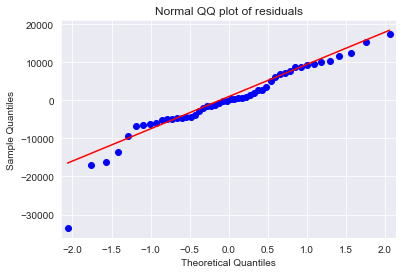

In [28]:
qqplot = sm.qqplot(model.resid, line='q')
plt.title("Normal QQ plot of residuals")
plt.show

In [29]:
model.resid

0      -128.741364
1      2720.739894
2      8774.203265
3      9317.013809
4     -6089.193819
5     -6482.687120
6     -1976.782788
7     -4403.044651
8       577.026673
9     -5069.702529
10    10457.307408
11     8730.799217
12    12302.602193
13     6876.101014
14   -17091.732777
15   -16226.595515
16    10138.855472
17    -4715.039933
18    -4882.825743
19     7182.671590
20     1903.295561
21    -5888.485088
22    -4481.055137
23    -1389.806104
24    -4742.333453
25     5204.071081
26    -5031.761170
27    -9271.494028
28     1463.792613
29     -716.402030
30      308.579462
31     -133.736321
32    -1560.396605
33    -1282.438947
34     7738.095839
35     6059.500395
36    15285.097137
37      371.437779
38    11622.538393
39    -2679.216039
40     3477.163826
41     2842.518953
42      922.496288
43     9658.711782
44      615.182788
45    17337.715291
46    -6782.242680
47    -3908.502003
48   -13449.663082
49   -33503.638791
dtype: float64

In [30]:
# function to Standardize the values
def standardized_values(values):
    return (values - values.mean()/values.std())

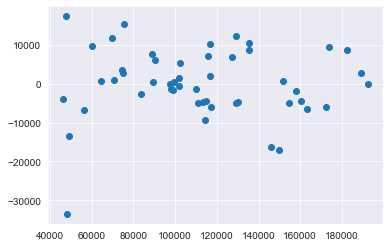

In [31]:
#residual plot for Homoscedasticity
plt.scatter(standardized_values(model.fittedvalues), standardized_values(model.resid))

### Residual vs regressors:

<function matplotlib.pyplot.show(*args, **kw)>

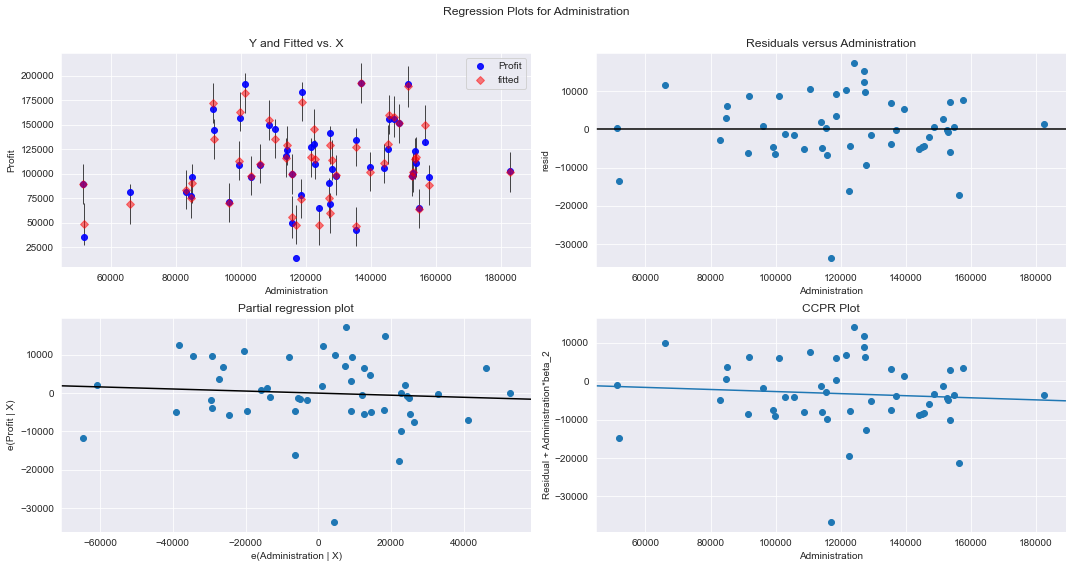

In [32]:
# Administration
fig = plt.figure(figsize=(15,8))
fif = sm.graphics.plot_regress_exog(model, "Administration", fig = fig)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

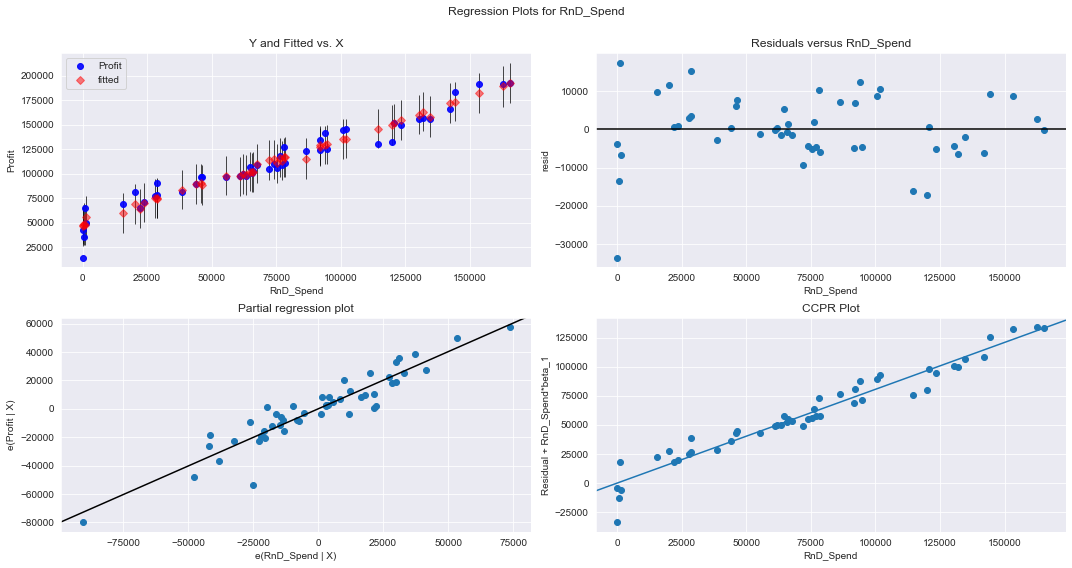

In [33]:
# R&D Spend
fig = plt.figure(figsize=(15,8))
fif = sm.graphics.plot_regress_exog(model, "RnD_Spend", fig = fig)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

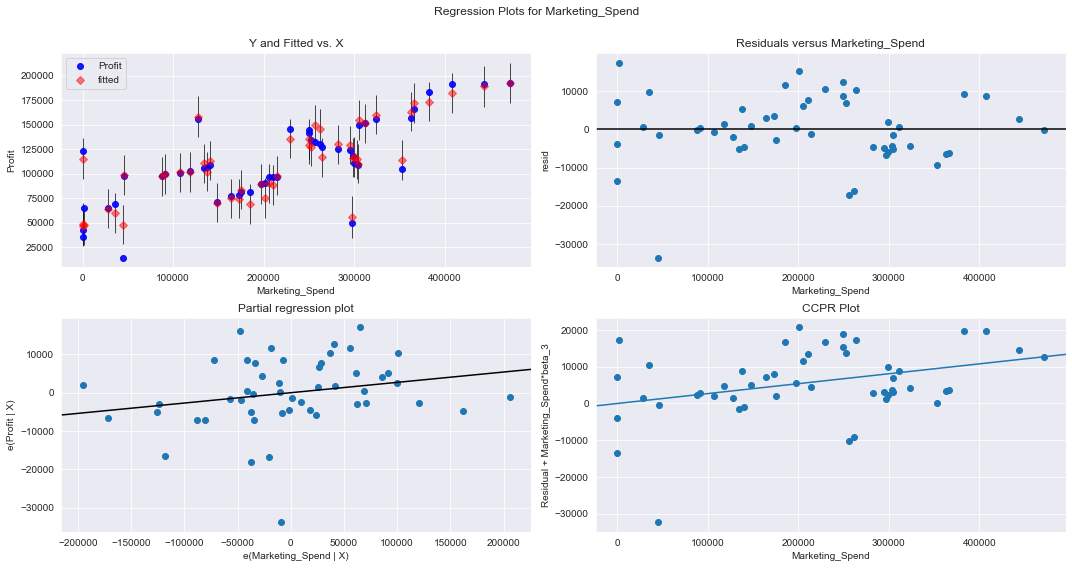

In [34]:
# Marketing_Spend
fig = plt.figure(figsize=(15,8))
fif = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig = fig)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

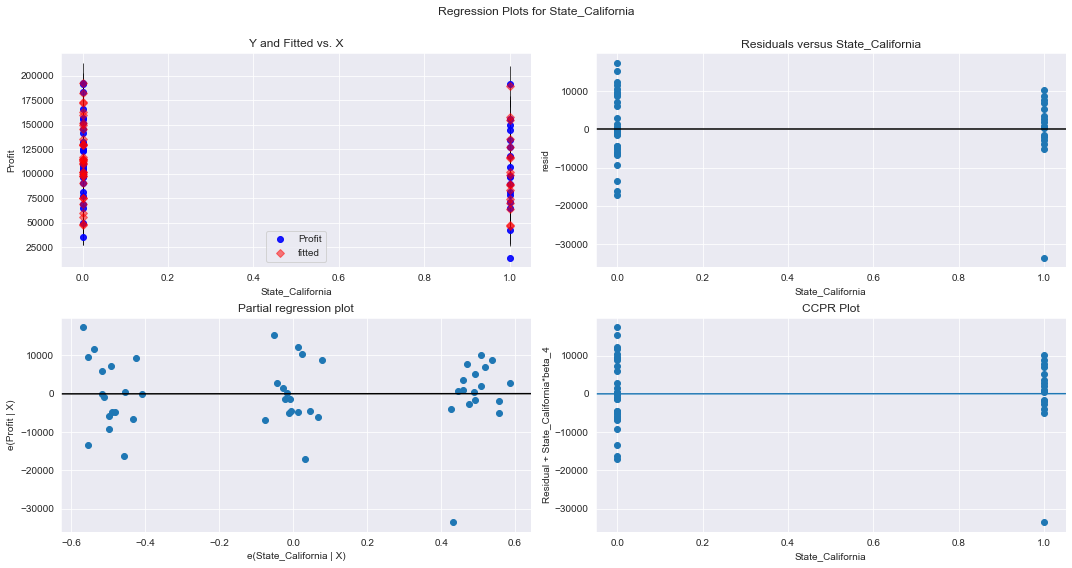

In [35]:
# State_California
fig = plt.figure(figsize=(15,8))
fif = sm.graphics.plot_regress_exog(model, "State_California", fig = fig)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

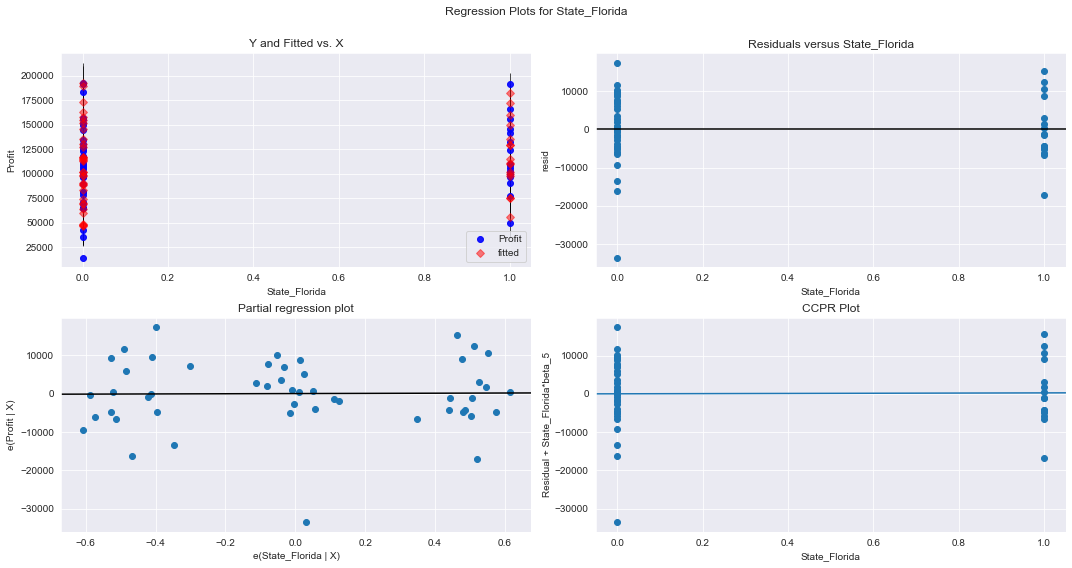

In [36]:
# State_Florida
fig = plt.figure(figsize=(15,8))
fif = sm.graphics.plot_regress_exog(model, "State_Florida", fig = fig)
plt.show

## Model deletion Diagnostics

### Detecting the influencers/ outliers

### Cook's distance:

In [37]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

In [38]:
c

array([7.67941282e-06, 3.96002384e-03, 2.78948395e-02, 2.35705108e-02,
       1.40231490e-02, 1.17098970e-02, 2.49314176e-03, 4.16542624e-03,
       7.29467176e-05, 6.31415598e-03, 2.21391699e-02, 1.93512168e-02,
       2.13263552e-02, 7.40092001e-03, 7.20165958e-02, 4.34157410e-02,
       1.57591120e-02, 4.33058862e-03, 3.43997076e-03, 3.28909738e-02,
       7.03247647e-04, 1.17002661e-02, 3.52541534e-03, 3.68801928e-04,
       5.07030667e-03, 4.16365620e-03, 5.79414020e-03, 3.25030423e-02,
       1.07438091e-03, 1.14685871e-04, 2.67092819e-05, 4.26003186e-06,
       6.55180125e-04, 2.69550649e-04, 2.09894518e-02, 8.32171521e-03,
       5.92471519e-02, 7.19280440e-05, 5.58017593e-02, 1.60830329e-03,
       2.27122555e-03, 2.19513492e-03, 1.66164967e-04, 2.33988898e-02,
       1.16697070e-04, 9.43947846e-02, 4.23233340e-02, 4.48153392e-03,
       1.56376134e-01, 2.63959436e-01])

<ipython-input-39-492b2db7d78b>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(data)), np.round(c,3))


<function matplotlib.pyplot.show(*args, **kw)>

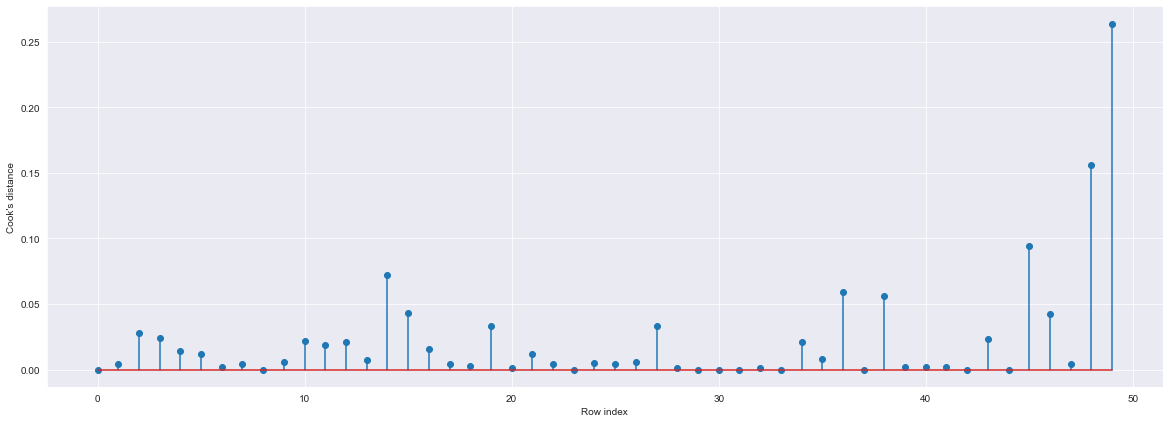

In [39]:
### Plotting the Cooks Distance:
figure = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(data)), np.round(c,3))
plt.xlabel("Row index")
plt.ylabel("Cook's distance")
plt.show

In [40]:
np.argmax(c), np.max(c)

(49, 0.2639594358495057)

### High influence plot:

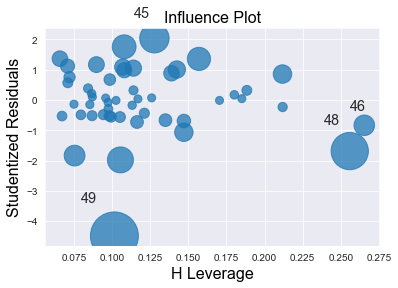

In [41]:
influence_plot(model)
plt.show()

In [42]:
# finding the cut off value
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3 * ((k+1)/ n)
leverage_cutoff

0.48

###### The cut off value is higher so we are not dropping any rows

#### Checking the AIC of the model

In [43]:
model.aic

1062.764909597834

#### The p value of State California was higher than 0.05, let us remove the column and see if there is any improvement in the model

In [44]:
model_2 = smf.ols("Profit~RnD_Spend+Administration+Marketing_Spend+State_Florida", data = data).fit()

In [45]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           8.49e-29
Time:                        06:15:01   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
RnD_Spend           0.8060      0.046     17.606      0.000       0.714       0.898
Administration     -0.0270      0.052     -0.523      0.604      -0.131       0.077
Marketing_Spend     0.0270      0.017      1.592      0.118      -0.007       0.061
State_Florida     220.1585   2900.536      0.076      0.940   -5621.821    6062.138
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###### Observation: When we removed the whole row of State California we see that the adj rsquared value has increased just a little but the F Statistic has increased tremendously showing that the features are more relevant using the ANOVA test

### Backward Elimination:

In [46]:
# The pvalue of State_florida is high too, lets remove that and see if there is any improvement

model_3 = smf.ols("Profit~RnD_Spend+Administration+Marketing_Spend", data = data).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           4.53e-30
Time:                        06:15:22   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD_Spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Observation: The adj rsquared value has become better and also the F Statistic has shot up showing that we have remmoved variables that are irrelevant

In [47]:
# removing the Administration Feature as the Pvalue is too high
model_4 = smf.ols("Profit~RnD_Spend+Marketing_Spend", data = data).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           2.16e-31
Time:                        06:15:25   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RnD_Spend           0.7966      0.041     19.266      0.000       0.713       0.880
Marketing_Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<function matplotlib.pyplot.show(*args, **kw)>

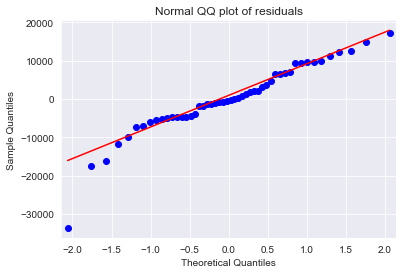

In [48]:
qqplot = sm.qqplot(model_4.resid, line='q')
plt.title("Normal QQ plot of residuals")
plt.show

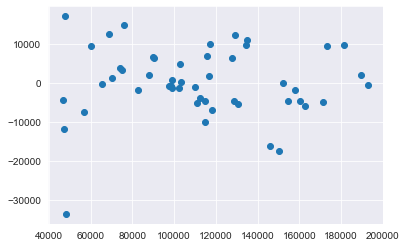

In [49]:
#residual plot for Homoscedasticity
plt.scatter(standardized_values(model_4.fittedvalues), standardized_values(model_4.resid))

In [50]:
model_influence = model_4.get_influence()
(c,_) = model_influence.cooks_distance

In [51]:
c

array([1.81512394e-04, 2.17714151e-03, 3.85030256e-02, 2.97393985e-02,
       7.43914487e-03, 8.87288175e-03, 3.60799476e-03, 4.97976353e-03,
       2.01902031e-06, 4.00294501e-03, 1.64482064e-02, 1.07062146e-02,
       1.52583172e-02, 4.10195007e-03, 6.23696501e-02, 4.28041217e-02,
       1.08143179e-02, 3.37984862e-03, 2.70426509e-03, 5.18325214e-02,
       5.68610172e-04, 8.25784837e-03, 4.13103131e-03, 3.07888695e-04,
       2.54030757e-03, 2.87274239e-03, 4.56256249e-03, 3.76461096e-02,
       4.04646886e-06, 3.84226278e-04, 1.54537882e-04, 1.49920702e-04,
       7.91098475e-04, 7.81029691e-05, 6.23157729e-03, 6.50961158e-03,
       5.60674443e-02, 5.62367665e-04, 4.68122817e-02, 5.47791686e-04,
       2.06083678e-03, 2.68539324e-03, 3.32631540e-04, 2.55928157e-02,
       2.50014790e-05, 1.17553495e-01, 7.74416953e-02, 7.99827600e-03,
       5.61942095e-02, 3.89488623e-01])

<ipython-input-53-492b2db7d78b>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(data)), np.round(c,3))


<function matplotlib.pyplot.show(*args, **kw)>

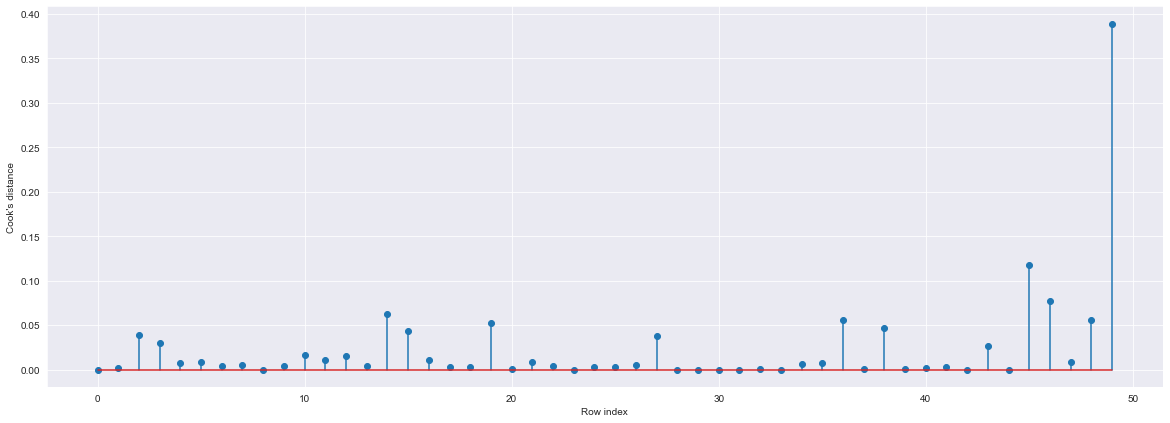

In [53]:
### Plotting the Cooks Distance:
figure = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(data)), np.round(c,3))
plt.xlabel("Row index")
plt.ylabel("Cook's distance")
plt.show

In [54]:
np.argmax(c), np.max(c)

(49, 0.3894886227924919)

##### Observation: We can see that the 49th argument though not above the value of 1 is significantly different from others

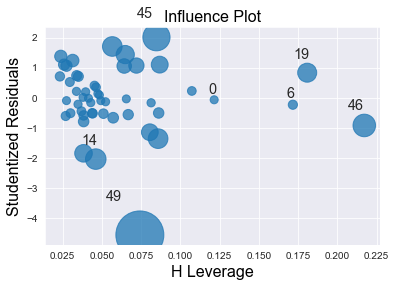

In [55]:
influence_plot(model_4)
plt.show()

###### Observation: Here too we can see that the 49th observation is highly influential.

In [56]:
# removing the 49th observation and checking if the model is getting any better:
data[data.index.isin([49])]

,RnD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New York
49,0.0,116983.8,45173.06,14681.4,1,0,0


In [57]:
data_copy = data.copy()
data_copy = data_copy.drop(data_copy.index[49], axis=0).reset_index()
data_copy

,index,RnD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New York
0,0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,9,123334.88,108679.17,304981.62,149759.96,1,0,0


### Model without the 49th row

In [58]:
model_5 = smf.ols("Profit~RnD_Spend+Marketing_Spend", data = data_copy).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           3.74e-33
Time:                        06:15:56   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
RnD_Spend           0.7754      0.035     22.136      0.000       0.705       0.846
Marketing_Spend     0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###### The pvalue of Marketing Spend (feature) is higher than 0.05 therefore lets remove and check the model

In [67]:
# Making a data frame to check which model is the best


model_dict = {
    "Model": ["model", "model_2", "model_3", "model_4", "model_5"],
    "Model Info": ["All features", "excluding State_California", 
                   "excluding State_California & State_Florida",
                  "Using only R&D Spend and Marketing Spend", 
                  "Using only R&D Spend and Marketing Spend & removing influencing data"],
    "rsquared": [model.rsquared, model_2.rsquared, 
                 model_3.rsquared, model_4.rsquared,
                 model_5.rsquared],
    "Adj rsquared": [model.rsquared_adj, model_2.rsquared_adj, 
                 model_3.rsquared_adj, model_4.rsquared_adj,
                 model_5.rsquared_adj],
    "AIC": [model.aic, model_2.aic, 
                 model_3.aic, model_4.aic,
                 model_5.aic]
}

model_check = pd.DataFrame(model_dict)
model_check

,Model,Model Info,rsquared,Adj rsquared,AIC
0,model,All features,0.950752,0.945156,1062.764910
1,model_2,excluding State_California,0.950752,0.946375,1060.765098
2,model_3,excluding State_California & State_Florida,0.950746,0.947534,1058.771499
3,model_4,Using only R&D Spend and Marketing Spend,0.950450,0.948342,1057.070772
4,model_5,Using only R&D Spend and Marketing Spend & rem...,0.961086,0.959394,1018.856480


###### Obsevation: Model_5 is the best model as the adj rsquared and AIC are better than others